### Se pide, usando regresión lineal:



In [2]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

### Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [4]:
df = pd.DataFrame(lista_alumnos, columns=["Nombre", "Edad", "Altura"])
df

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 636.0+ bytes


In [6]:
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


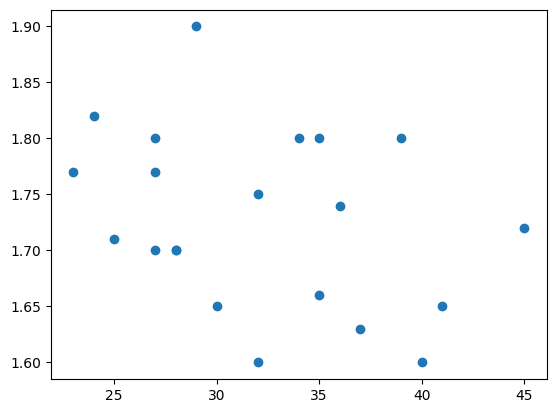

In [9]:
plt.scatter(df["Edad"], df["Altura"])

<Axes: xlabel='Edad', ylabel='Altura'>

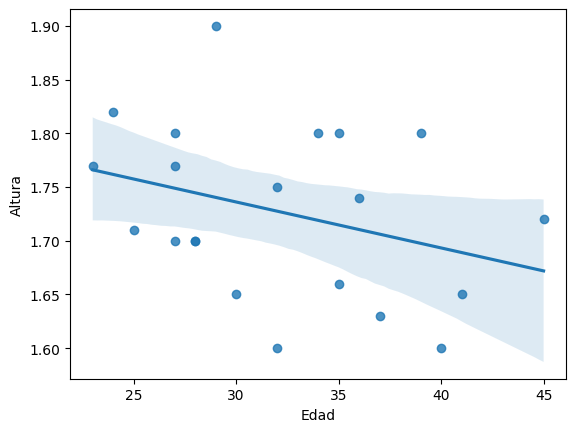

In [12]:
sns.regplot(data = df, x = "Edad", y = "Altura")

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

<Axes: >

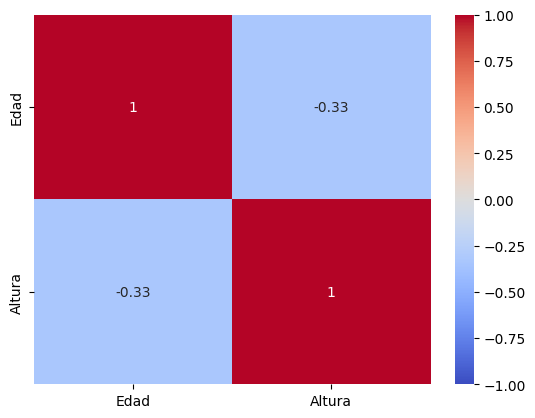

In [13]:
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1)

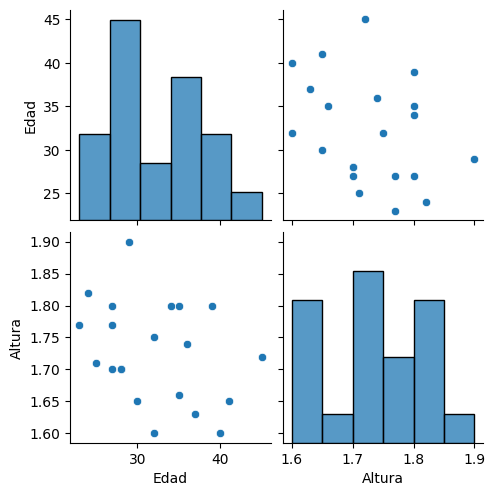

In [14]:
sns.pairplot(df)

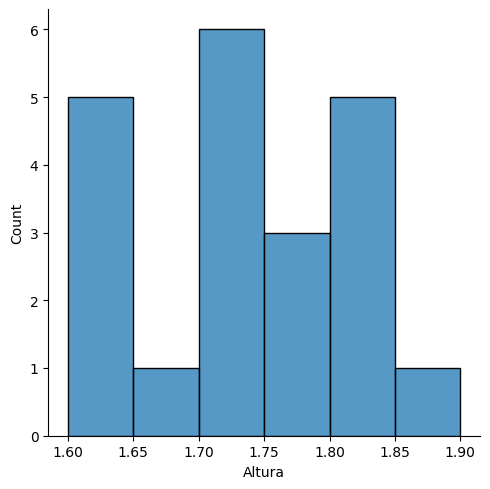

In [15]:
sns.displot(df["Altura"])

### Entrena un modelo de regresión lineal

In [19]:
X = df[["Edad"]]
y = df["Altura"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=11)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16, 1)
(16,)
(5, 1)
(5,)


In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
pred = lm.predict([[31]])
print(pred)

[1.73609347]


c:\Users\Diego Nuñez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

In [31]:
lm.score(X_test, y_test)

0.1791251722252678

In [33]:
pred = lm.predict(X_test)

In [35]:
X_test

,Edad
3,37
5,27
10,41
6,28
15,32


In [34]:
pred

array([1.71878785, 1.74763055, 1.70725076, 1.74474628, 1.7332092 ])

In [37]:
valores = X_test
valores["Altura"] = y_test
valores["pred"] = pred
valores

,Edad,pred,Altura
3,37,1.718788,1.63
5,27,1.747631,1.80
10,41,1.707251,1.65
6,28,1.744746,1.70
15,32,1.733209,1.75


In [41]:
print("Mae: ", mean_absolute_error(y_test, pred))
print("Mse: ", mean_squared_error(y_test, pred))
print("Rmse: ", mean_squared_error(y_test, pred) ** 0.5)
print("Mape: ", mean_absolute_percentage_error(y_test, pred))

Mae:  0.05198902837852097
Mse:  0.0032375303207435495
Rmse:  0.05689929982647897
Mape:  0.030835745601908084
